In [1]:
import tensorflow as tf
import tensorflow.contrib.eager as tfe
tfe.enable_eager_execution()

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
print(tf.__version__)

1.9.0


In [3]:
import numpy as np

In [4]:
# Simple example
z = tf.constant(np.arange(10))
print(z)

tf.Tensor([0 1 2 3 4 5 6 7 8 9], shape=(10,), dtype=int64)


In [5]:
s = np.array(10)
print(s)

10


In [6]:
z_tf = tf.multiply(z, s)
print(z_tf)

tf.Tensor([ 0 10 20 30 40 50 60 70 80 90], shape=(10,), dtype=int64)


In [7]:
"""
Calculate gradients in TensorFlow Eager
"""
def f_cubed(x):
    return x ** 3

grad = tfe.gradients_function(f_cubed) # 3x^2
print(grad(3.)) # Returns a list of Tensor
print(grad(3.)[0])
print(grad(3.)[0].numpy())

[<tf.Tensor: id=20, shape=(), dtype=float32, numpy=27.0>]
tf.Tensor(27.0, shape=(), dtype=float32)
27.0


In [8]:
"""
A polynomial line fitting example
"""
x = np.arange(0, 5, 0.1)
print(x)
y = x ** 3 - 4 * x ** 2 - 2 * x + 2
print(y)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9]
[  2.      1.761   1.448   1.067   0.624   0.125  -0.424  -1.017  -1.648
  -2.311  -3.     -3.709  -4.432  -5.163  -5.896  -6.625  -7.344  -8.047
  -8.728  -9.381 -10.    -10.579 -11.112 -11.593 -12.016 -12.375 -12.664
 -12.877 -13.008 -13.051 -13.    -12.849 -12.592 -12.223 -11.736 -11.125
 -10.384  -9.507  -8.488  -7.321  -6.     -4.519  -2.872  -1.053   0.944
   3.125   5.496   8.063  10.832  13.809]


In [9]:
y_noise = y + np.random.normal(0, 1.5, size=(len(x), ))
print(y_noise)

[  1.43537494   2.34175713  -0.58466004  -0.18913301   2.06213005
   1.27274533   1.3167689    1.81448509   1.64180469   0.88138355
  -0.65327266  -3.51579682  -4.53234997  -3.26960189  -4.76476711
  -3.98403459  -5.6595497   -6.46192125  -7.13056312  -7.05269177
 -12.00391621  -8.51014407 -11.2522427  -10.61837511 -13.71245207
 -12.05033599 -11.62493691 -12.78182734 -13.84757979 -14.56323427
 -12.77886438 -14.14413277 -12.92460792 -10.1481038  -10.54094769
 -11.42751008 -10.39011455  -6.26785639  -8.96354427  -5.4177776
  -7.0851433   -3.75019457  -3.65391737  -1.04892907   0.49088704
   2.29677073   7.43342463   6.3138639   10.37735534  13.39631575]


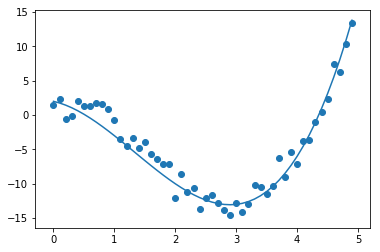

In [11]:
import matplotlib.pyplot as plt
plt.plot(x, y)
plt.scatter(x, y_noise)
plt.show()

In [12]:
"""
Define some useful functions
"""
def get_batch(x, y, batch_size=20):
    idxs = np.random.randint(0, len(x), batch_size)
    return x[idxs], y[idxs]

class PolyModel(object):
    def __init__(self):
        self.w = tfe.Variable(tf.random_normal([4]))
    
    def f(self, x):
        return self.w[0] * x ** 3 + self.w[1] * x ** 2 + self.w[2] * x + self.w[3]
    
def loss(model, x, y):
    err = model.f(x) - y
    return tf.reduce_mean(tf.square(err))

In [13]:
# Train the model
model = PolyModel()
grad = tfe.implicit_gradients(loss)
optimizer = tf.train.AdamOptimizer()
iters = 20000
for i in range(iters):
    x_batch, y_batch = get_batch(x, y)
    optimizer.apply_gradients(grad(model, x_batch, y_batch))
    if i % 1000 == 0:
        print(f"Iteration {i + 1}, loss: {loss(model, x_batch, y_batch).numpy()}")

Iteration 1, loss: 891.1923828125
Iteration 1001, loss: 83.82699584960938
Iteration 2001, loss: 55.67718505859375
Iteration 3001, loss: 36.95344924926758
Iteration 4001, loss: 22.150930404663086
Iteration 5001, loss: 22.940906524658203
Iteration 6001, loss: 17.128955841064453
Iteration 7001, loss: 17.089468002319336
Iteration 8001, loss: 14.201647758483887
Iteration 9001, loss: 10.274221420288086
Iteration 10001, loss: 8.437150955200195
Iteration 11001, loss: 6.740107536315918
Iteration 12001, loss: 3.5904109477996826
Iteration 13001, loss: 3.7451369762420654
Iteration 14001, loss: 2.9400837421417236
Iteration 15001, loss: 1.441570520401001
Iteration 16001, loss: 1.5655500888824463
Iteration 17001, loss: 0.5081464648246765
Iteration 18001, loss: 0.6826947927474976
Iteration 19001, loss: 0.42817091941833496


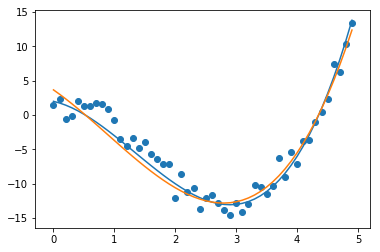

In [14]:
# Plot the result
plt.plot(x, y)
plt.plot(x, model.f(x).numpy())
plt.scatter(x, y_noise)
plt.show()

In [15]:
"""
A Neural Network with TensorFlow Eager
"""
mnist = tf.keras.datasets.mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [16]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [17]:
# A function to scale the data
def scale(x, min_val=0.0, max_val=255.0):
    x = tf.to_float(x)
    return tf.div(tf.subtract(x, min_val), tf.subtract(max_val, min_val))

In [18]:
# Using TF Dataset API
train_ds = tf.data.Dataset.from_tensor_slices((X_train, Y_train))
train_ds = train_ds.map(lambda X, Y: (scale(X), tf.one_hot(Y, 10))).shuffle(10000).batch(30)
test_ds = tf.data.Dataset.from_tensor_slices((X_test, Y_test))
test_ds = test_ds.map(lambda X, Y: (scale(X), tf.one_hot(Y, 10))).shuffle(10000).batch(30)

In [19]:
# Define the model
class MNISTModel(tf.keras.Model):
    def __init__(self, device='cpu:0'):
        super(MNISTModel, self).__init__()
        self.device = device
        self._input_shape = (-1, 28, 28, 1)
        self.conv1 = tf.layers.Conv2D(32, 5,
                                      padding='same',
                                      activation=tf.nn.relu)
        self.max_pool2d = tf.layers.MaxPooling2D((2, 2), (2, 2), padding='same')
        self.conv2 = tf.layers.Conv2D(64, 5,
                                      padding='same',
                                      activation=tf.nn.relu)
        self.fc1 = tf.layers.Dense(750, activation=tf.nn.relu)
        self.dropout = tf.layers.Dropout(0.5)
        self.fc2 = tf.layers.Dense(10)

    def call(self, X):
        X = tf.reshape(X, self._input_shape)
        X = self.max_pool2d(self.conv1(X))
        X = self.max_pool2d(self.conv2(X))
        X = tf.layers.flatten(X)
        X = self.dropout(self.fc1(X))
        return self.fc2(X)

In [20]:
# Define the loss
def loss_fn(model, X, Y):
    return tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits_v2(logits=model(X), labels=Y)
    )

In [21]:
# Calculate the accuracy
def get_accuracy(model, X, Y_true):
    logits = model(X)
    prediction = tf.nn.softmax(logits)
    prediction = tf.argmax(prediction, 1)
    equality = tf.equal(prediction, tf.argmax(Y_true, 1))
    accuracy = tf.reduce_mean(tf.cast(equality, tf.float32))
    return accuracy

In [22]:
# Train the model
model = MNISTModel()
optimizer = tf.train.AdamOptimizer()
epochs = 1000
for (batch, (images, labels)) in enumerate(train_ds):
    with tfe.GradientTape() as tape:
        loss = loss_fn(model, images, labels)
    grads = tape.gradient(loss, model.variables)
    optimizer.apply_gradients(zip(grads, model.variables), global_step=tf.train.get_or_create_global_step())
    if batch % 10 == 0:
        acc = get_accuracy(model, images, labels).numpy()
        print(f"Iteration {batch}, loss: {loss_fn(model, images, labels).numpy()}, accuracy: {acc}")
    if batch > epochs:
        break

Iteration 0, loss: 1.890453815460205, accuracy: 0.2666666805744171
Iteration 10, loss: 1.0856778621673584, accuracy: 0.6666666865348816
Iteration 20, loss: 0.6313592791557312, accuracy: 0.699999988079071
Iteration 30, loss: 0.7978754639625549, accuracy: 0.800000011920929
Iteration 40, loss: 0.35299840569496155, accuracy: 0.8999999761581421
Iteration 50, loss: 0.21214130520820618, accuracy: 0.9666666388511658
Iteration 60, loss: 0.28572311997413635, accuracy: 0.9333333373069763
Iteration 70, loss: 0.25776660442352295, accuracy: 0.9666666388511658
Iteration 80, loss: 0.12185333669185638, accuracy: 0.9666666388511658
Iteration 90, loss: 0.15315580368041992, accuracy: 0.9666666388511658
Iteration 100, loss: 0.08691634982824326, accuracy: 0.9666666388511658
Iteration 110, loss: 0.08776883780956268, accuracy: 1.0
Iteration 120, loss: 0.19949603080749512, accuracy: 0.9333333373069763
Iteration 130, loss: 0.09362144768238068, accuracy: 0.9666666388511658
Iteration 140, loss: 0.1018757447600364

In [25]:
# Calculate test set accuracy
avg_acc = 0
test_epochs = 20
for (batch, (images, labels)) in enumerate(test_ds):
    avg_acc += get_accuracy(model, images, labels).numpy()
    if batch % 100 == 0 and batch != 0:
        print(f"Iteration {batch}, Average test accuracy: {avg_acc / batch}")
print(f"Final test accuracy: {avg_acc / batch}")

Iteration 100, Average test accuracy: 0.9953333246707916
Iteration 200, Average test accuracy: 0.991333324611187
Iteration 300, Average test accuracy: 0.9901111026604971
Final test accuracy: 0.9899899816369867
